# **Chapter 02:**
Merging DataFrames with Pandas

---



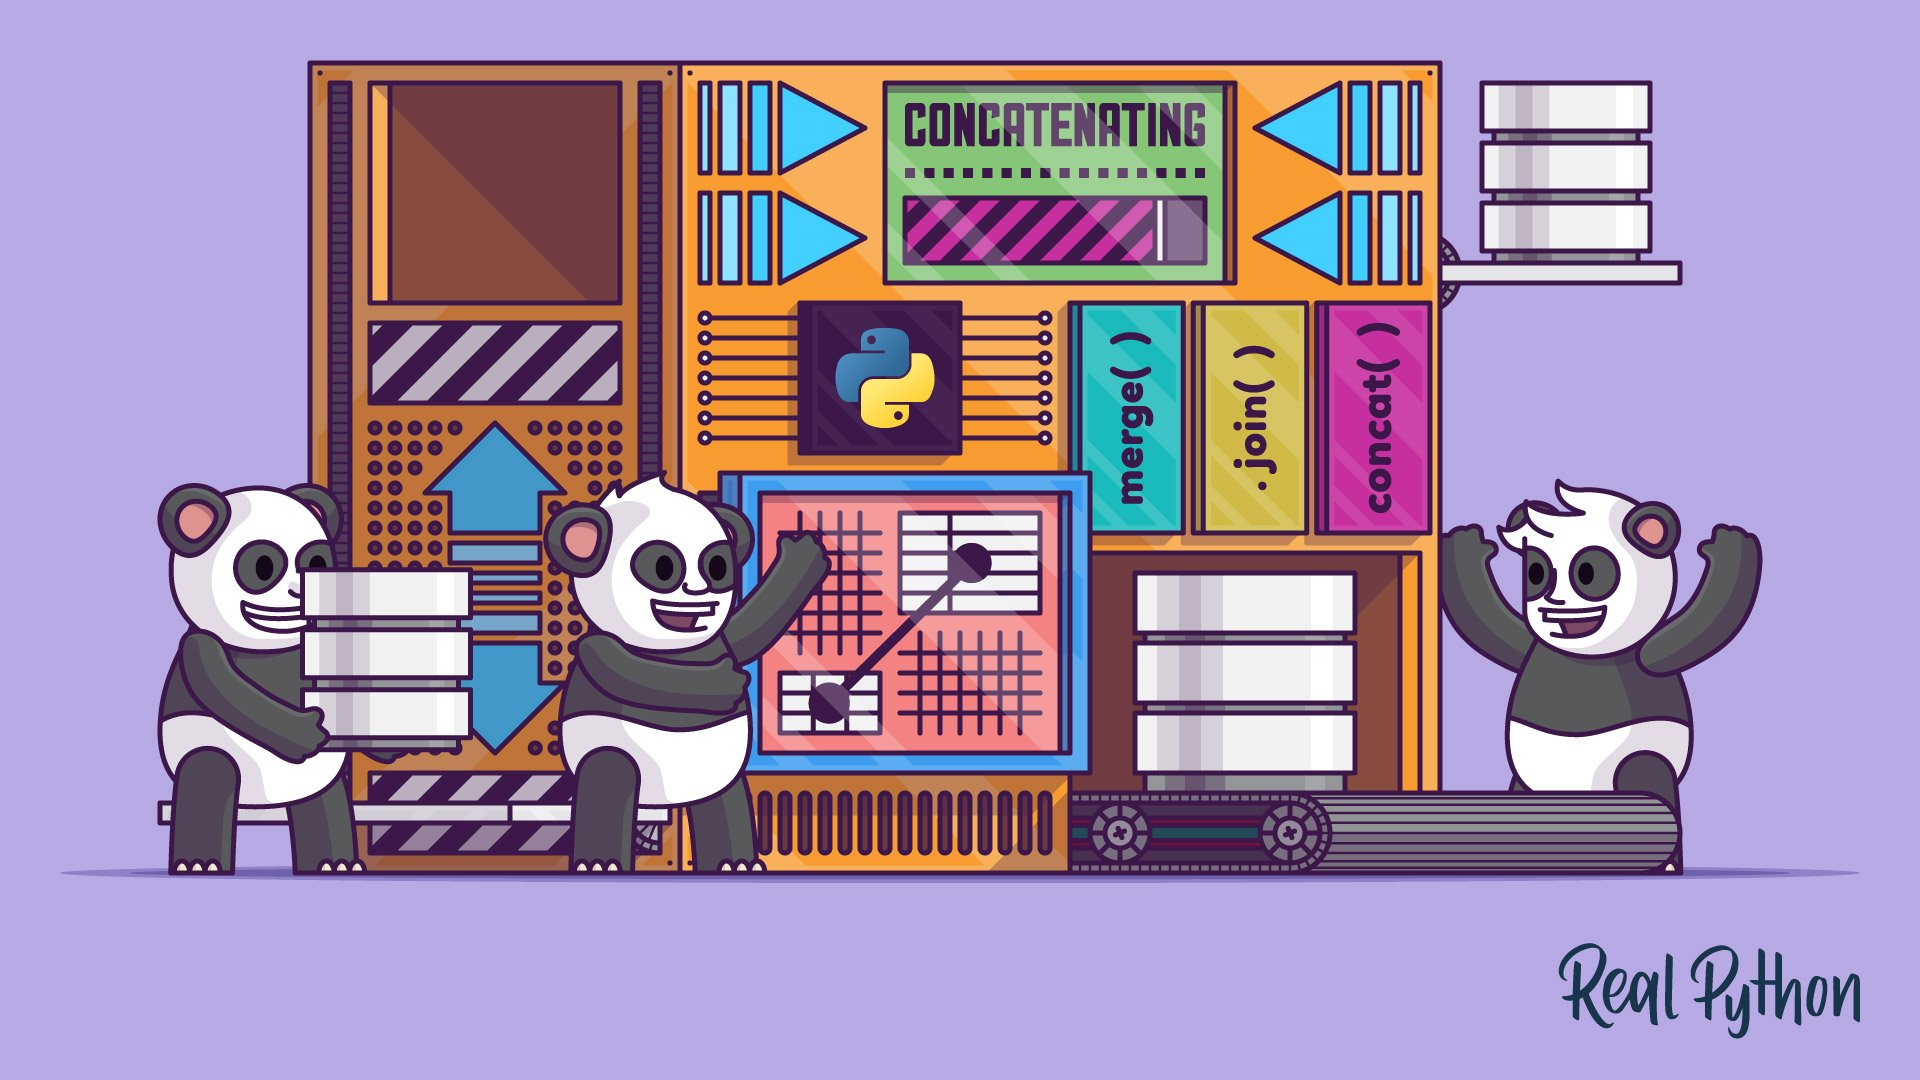

## **LECTURE 01:** *Importing Multiple Files*












In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/DataAnalysis-with-Python

/content/drive/MyDrive/DataAnalysis-with-Python


In [4]:
import pandas as pd

In [44]:
silver = pd.read_csv('Silver.csv')
gold = pd.read_csv('Gold.csv')
bronze = pd.read_csv('Bronze.csv')
bronze.head()

,NOC,Country,Total
0,USA,United States,1052.0
1,URS,Soviet Union,584.0
2,GBR,United Kingdom,505.0
3,FRA,France,475.0
4,GER,Germany,454.0


In [ ]:
silver.head()

,NOC,Country,Total
0,USA,United States,1195.0
1,URS,Soviet Union,627.0
2,GBR,United Kingdom,591.0
3,FRA,France,461.0
4,GER,Germany,350.0


In [ ]:
silver.shape

(138, 3)

In [ ]:
# Create the list of file names: filenames
filenames = ['Gold.csv', 'Silver.csv', 'Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames :
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[2].head())

   NOC         Country   Total
0  USA   United States  1052.0
1  URS    Soviet Union   584.0
2  GBR  United Kingdom   505.0
3  FRA          France   475.0
4  GER         Germany   454.0


In [ ]:
# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels
medals.head()

,NOC,Country,Gold
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0


In [ ]:
medals.columns

Index(['NOC', 'Country', 'Gold'], dtype='object')

In [ ]:
medals.rename({"Gold": "Golden"}, axis=1, inplace=False)

,NOC,Country,Golden
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0
...,...,...,...
133,SEN,Senegal,NaN
134,SUD,Sudan,NaN
135,TGA,Tonga,NaN
136,BDI,Burundi,1.0


In [ ]:
medals.head()

,NOC,Country,Gold
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0


In [ ]:
# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

medals.head()

,NOC,Country,Gold,Silver,Bronze
0,USA,United States,2088.0,1195.0,1052.0
1,URS,Soviet Union,838.0,627.0,584.0
2,GBR,United Kingdom,498.0,591.0,505.0
3,FRA,France,378.0,461.0,475.0
4,GER,Germany,407.0,350.0,454.0


## **LECTURE 02:** *Indexing and Reindexing*

In [ ]:
max_weather = pd.read_csv('monthly_max_temp.csv', index_col='Month')
mean_weather = pd.read_csv('monthly_mean_temp.csv', index_col='Month')

weather1 = max_weather.copy()
weather1.head()

,Max TemperatureF
Month,
Jan,68
Feb,60
Mar,68
Apr,84
May,88


In [ ]:
weather1.index

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name='Month')

### Sorting Index

In [ ]:

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
print(weather2.head())

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Print the head of weather3
print(weather3.head())

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')

# Print the head of weather4
print(weather4.head())

       Max TemperatureF
Month                  
Apr                  84
Aug                  86
Dec                  68
Feb                  60
Jan                  68
       Max TemperatureF
Month                  
Sep                  90
Oct                  84
Nov                  72
May                  88
Mar                  68
       Max TemperatureF
Month                  
Feb                  60
Jan                  68
Mar                  68
Dec                  68
Nov                  72


In [ ]:
weather1.head()

,Max TemperatureF
Month,
Jan,68
Feb,60
Mar,68
Apr,84
May,88


### Reindexing

In [ ]:
ordered = ['Jan', 'Apr', 'Jul', 'Oct']
weather1.reindex(ordered)

,Max TemperatureF
Month,
Jan,68
Apr,84
Jul,91
Oct,84


### Reindex from a DataFrame Index

In [ ]:
mean_weather.index

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='Month')

In [ ]:
weather1.reindex(mean_weather.index)

,Max TemperatureF
Month,
Apr,84
Aug,86
Dec,68
Feb,60
Jan,68
Jul,91
Jun,89
Mar,68
May,88


### Reindexing with missing labels

In [ ]:
weather1.reindex(['Apr','May','XYZ'])

,Max TemperatureF
Month,
Apr,84.0
May,88.0
XYZ,NaN


In [ ]:
weather1.reindex(['Apr','May','XYZ']).dropna()

,Max TemperatureF
Month,
Apr,84.0
May,88.0


In [ ]:
weather1.reindex(['Apr','May','XYZ']).bfill()

,Max TemperatureF
Month,
Apr,84.0
May,88.0
XYZ,NaN


### Resetting Index

In [ ]:
weather2 = weather1.reset_index(inplace=False)
weather2.head()

,Month,Max TemperatureF
0,Jan,68
1,Feb,60
2,Mar,68
3,Apr,84
4,May,88


In [ ]:
weather1.reset_index(inplace=True)

In [ ]:
weather1.head()

,Month,Max TemperatureF
0,Jan,68
1,Feb,60
2,Mar,68
3,Apr,84
4,May,88


In [ ]:
weather1.set_index('Month')

,Max TemperatureF
Month,
Jan,68
Feb,60
Mar,68
Apr,84
May,88
Jun,89
Jul,91
Aug,86
Sep,90


In [ ]:
max_weather.head()

,Max TemperatureF
Month,
Jan,68
Feb,60
Mar,68
Apr,84
May,88


In [ ]:
pd.merge(max_weather, mean_weather, left_index=True, right_index=True)

,Max TemperatureF,Mean TemperatureF
Month,,
Jan,68,32.354839
Feb,60,28.714286
Mar,68,35.000000
Apr,84,53.100000
May,88,62.612903
Jun,89,70.133333
Jul,91,72.870968
Aug,86,70.000000
Sep,90,63.766667


## **LECTURE 03:** *Concatinating and Appending Data*

**Append:** Stack one row below another  
**Concat:** Can stack row-wise or column-wise

In [4]:
pop1 = pd.read_csv('population_01.csv')
pop2 = pd.read_csv('population_02.csv')

In [20]:
pop1

,Zip Code ZCTA,2010 Census Population
0,66407,479
1,72732,4716
2,50579,2405
3,46421,30670


In [16]:
pop2

,Zip Code ZCTA,2010 Census Population
0,12776,2180
1,76092,26669
2,98360,12221
3,49464,27481


####Appending population dataframe

In [46]:
pop3 = pop1.append(pop2)

In [47]:
pop3

,Zip Code ZCTA,2010 Census Population
0,66407,479
1,72732,4716
2,50579,2405
3,46421,30670
0,12776,2180
1,76092,26669
2,98360,12221
3,49464,27481


In [48]:
pop3.loc[0]

,Zip Code ZCTA,2010 Census Population
0,66407,479
0,12776,2180


In [49]:
pop3.reset_index(drop=True)

,Zip Code ZCTA,2010 Census Population
0,66407,479
1,72732,4716
2,50579,2405
3,46421,30670
4,12776,2180
5,76092,26669
6,98360,12221
7,49464,27481


In [23]:
pop3.reset_index(drop=False)

,index,Zip Code ZCTA,2010 Census Population
0,0,66407,479
1,1,72732,4716
2,2,50579,2405
3,3,46421,30670
4,0,12776,2180
5,1,76092,26669
6,2,98360,12221
7,3,49464,27481


####Concatinating

In [77]:
pd.concat([pop1,pop2])

,Zip Code ZCTA,2010 Census Population
0,66407,479
1,72732,4716
2,50579,2405
3,46421,30670
0,12776,2180
1,76092,26669
2,98360,12221
3,49464,27481


In [18]:
pd.concat([pop1,pop2], ignore_index=True)

,Zip Code ZCTA,2010 Census Population
0,66407,479
1,72732,4716
2,50579,2405
3,46421,30670
4,12776,2180
5,76092,26669
6,98360,12221
7,49464,27481


### Concat and append two different dataframes

In [57]:
pd.read_csv('population_00.csv')

,Zip Code ZCTA,2010 Census Population
0,57538,322
1,59916,130
2,37660,40038
3,2860,45199


In [5]:
population = pd.read_csv('population_00.csv',index_col=0)
population

,2010 Census Population
Zip Code ZCTA,
57538,322
59916,130
37660,40038
2860,45199


In [6]:
unemployment = pd.read_csv('unemployment_00.csv',index_col=0)
unemployment

,unemployment,participants\t
Zip,,
2860,0.11,34447
46167,0.02,4800
1097,0.33,42
80808,0.07,4310


In [61]:
population.append(unemployment)

## notice we have repeated index <2860>

,2010 Census Population,unemployment,participants\t
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
37660,40038.0,NaN,NaN
2860,45199.0,NaN,NaN
2860,NaN,0.11,34447.0
46167,NaN,0.02,4800.0
1097,NaN,0.33,42.0
80808,NaN,0.07,4310.0


### Concatenating rows

In [41]:
pd.concat([population, unemployment], axis=0)

## still that repeated index <2860>

,2010 Census Population,unemployment,participants\t
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
37660,40038.0,NaN,NaN
2860,45199.0,NaN,NaN
2860,NaN,0.11,34447.0
46167,NaN,0.02,4800.0
1097,NaN,0.33,42.0
80808,NaN,0.07,4310.0


###Concatenating columns

In [42]:
pd.concat([population, unemployment], axis=1)

,2010 Census Population,unemployment,participants\t
1097,NaN,0.33,42.0
2860,45199.0,0.11,34447.0
37660,40038.0,NaN,NaN
46167,NaN,0.02,4800.0
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
80808,NaN,0.07,4310.0


### keys and MultiIndexes

In [9]:
data = pd.read_csv('q1_rainfall_2013.csv')
data = data.set_index('Month')
data

,Precipitation
Month,
Jan,0.096129
Feb,0.067143
Mar,0.061613


In [10]:
rain2013 = pd.read_csv('q1_rainfall_2013.csv', index_col='Month')
rain2013

,Precipitation
Month,
Jan,0.096129
Feb,0.067143
Mar,0.061613


In [11]:
rain2014 = pd.read_csv('q1_rainfall_2014.csv', index_col='Month')
rain2014

,Precipitation
Month,
Jan,0.050323
Feb,0.082143
Mar,0.070968


In [54]:
pd.concat([rain2013, rain2014], axis=0)

,Precipitation
Month,
Jan,0.096129
Feb,0.067143
Mar,0.061613
Jan,0.050323
Feb,0.082143
Mar,0.070968


#### Using multi-index on rows

In [18]:
rain1314 = pd.concat([rain2013, rain2014], keys=[2013, 2014], axis=0)
rain1314

Precipitation
     Month               
2013 Jan         0.096129
     Feb         0.067143
     Mar         0.061613
2014 Jan         0.050323
     Feb         0.082143
     Mar         0.070968

In [19]:
rain1314.loc[2014]

,Precipitation
Month,
Jan,0.050323
Feb,0.082143
Mar,0.070968


In [21]:
rain1314 = pd.concat([rain2013, rain2014], axis=1)
rain1314

,Precipitation,Precipitation
Month,,
Jan,0.096129,0.050323
Feb,0.067143,0.082143
Mar,0.061613,0.070968


#### Using multi-index on columns

In [22]:
rain1314 = pd.concat([rain2013, rain2014], keys=[2013, 2014], axis='columns')
rain1314

,2013,2014
,Precipitation,Precipitation
Month,,
Jan,0.096129,0.050323
Feb,0.067143,0.082143
Mar,0.061613,0.070968


In [25]:
rain1314[2013]

,Precipitation
Month,
Jan,0.096129
Feb,0.067143
Mar,0.061613


### Conact with dict

In [68]:
rain_dict = {
    2013: rain2013, 
    2014: rain2014
    }

In [69]:
rain1314 = pd.concat(rain_dict, axis='columns')
rain1314

,2013,2014
,Precipitation,Precipitation
Month,,
Jan,0.096129,0.050323
Feb,0.067143,0.082143
Mar,0.061613,0.070968


## **LECTURE 04:** *Joining Tables*

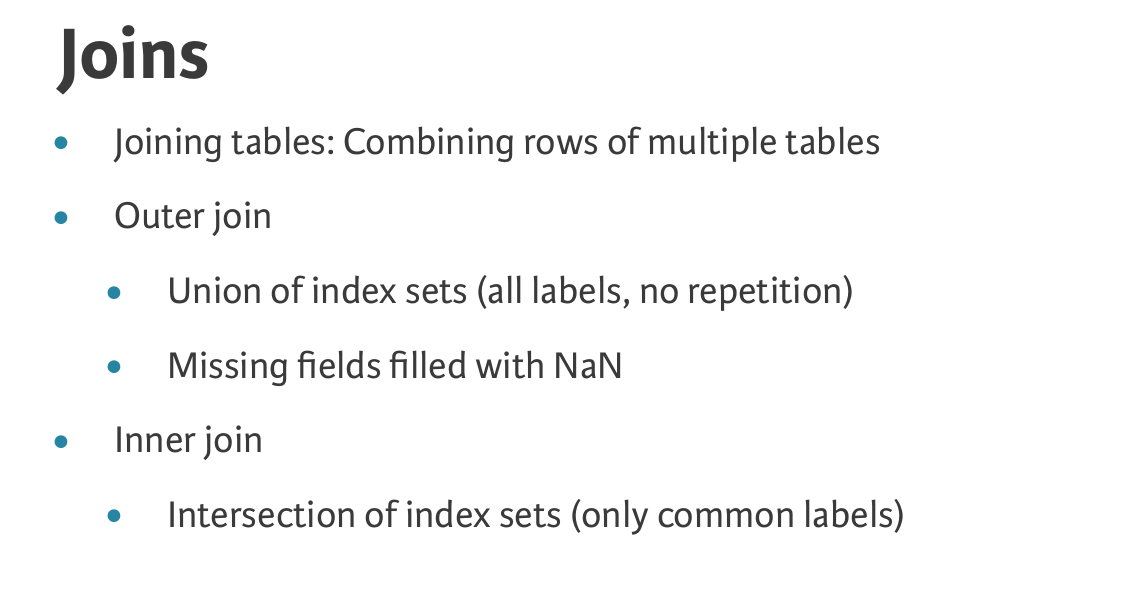

### Joins with concatination

In [8]:
pd.concat([population, unemployment], axis=1, join='inner')

,2010 Census Population,unemployment,participants\t
2860,45199,0.11,34447


In [9]:
pd.concat([population, unemployment], axis=1, join='outer')

,2010 Census Population,unemployment,participants\t
1097,NaN,0.33,42.0
2860,45199.0,0.11,34447.0
37660,40038.0,NaN,NaN
46167,NaN,0.02,4800.0
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
80808,NaN,0.07,4310.0


In [12]:
pd.concat([population, unemployment], join='inner', axis=1)

""
57538
59916
37660
2860
2860
46167
1097
80808


In [13]:
population

,2010 Census Population
Zip Code ZCTA,
57538,322
59916,130
37660,40038
2860,45199


In [15]:
population.join(unemployment, on='Zip Code ZCTA', how='inner')

,2010 Census Population,unemployment,participants\t
Zip Code ZCTA,,,
2860,45199,0.11,34447


## **LECTURE 05:** *Merging Dataframes*

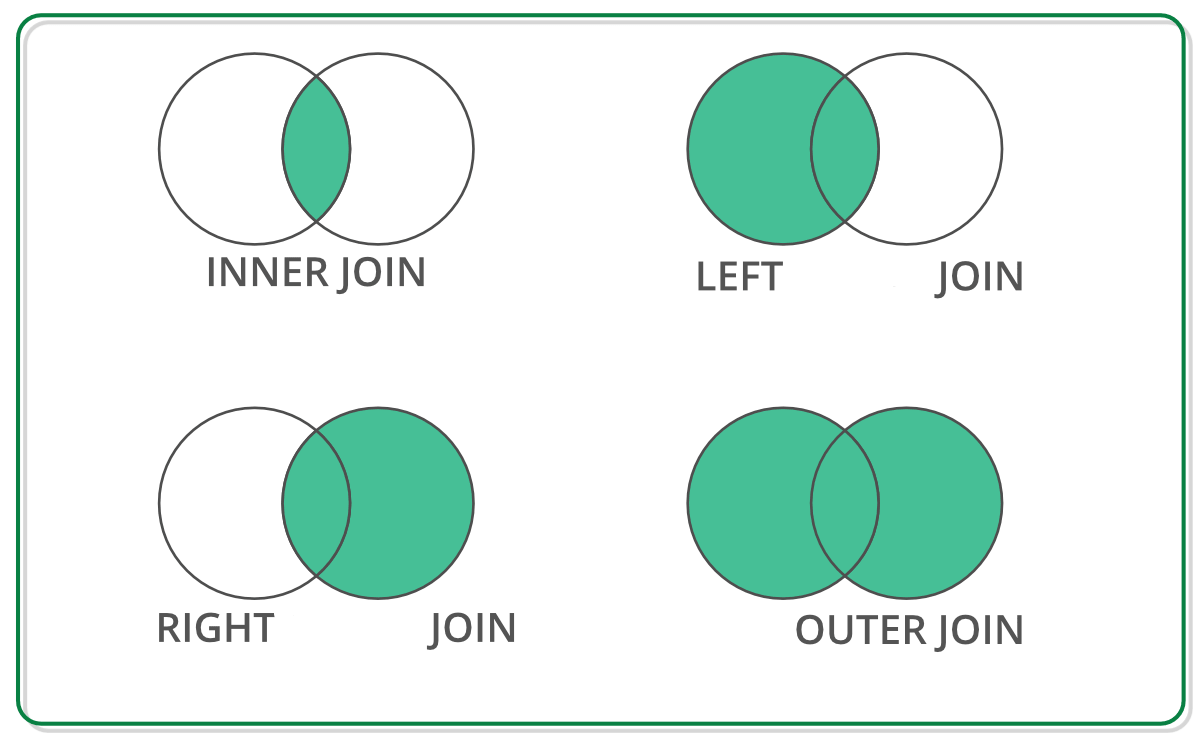

In [7]:
revenue = pd.read_csv('Book1.csv')
managers = pd.read_csv('Book2.csv')
print(revenue)
print(managers)

     city  revenue  branch_id
0  austin      100         10
1  denver       83         20
2  spring        4         30
3  mexico      200         47
     city managers  branch_id
0  austin      tom         10
1  denver      jon         20
2  mexico  charles         47
3  spring    jassy         31


### Pandas Merge

In [9]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city')

# Print merge_by_city
merge_by_city

,city,revenue,branch_id_x,managers,branch_id_y
0,austin,100,10,tom,10
1,denver,83,20,jon,20
2,spring,4,30,jassy,31
3,mexico,200,47,charles,47


In [10]:
# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue, managers, on='branch_id')

merge_by_id

,city_x,revenue,branch_id,city_y,managers
0,austin,100,10,austin,tom
1,denver,83,20,denver,jon
2,mexico,200,47,mexico,charles


In [10]:
managers['branch']=managers['city']
managers

,city,managers,branch_id,branch
0,austin,tom,10,austin
1,denver,jon,20,denver
2,mexico,charles,47,mexico
3,spring,jassy,31,spring


In [13]:
pd.merge(revenue, managers, left_on='city', right_on='branch')

,city_x,revenue,branch_id_x,city_y,managers,branch_id_y,branch
0,austin,100,10,austin,tom,10,austin
1,denver,83,20,denver,jon,20,denver
2,spring,4,30,spring,jassy,31,spring
3,mexico,200,47,mexico,charles,47,mexico


In [12]:
# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue, managers, left_on='city', right_on='branch', how='outer')
combined

,city_x,revenue,branch_id_x,city_y,managers,branch_id_y,branch
0,austin,100,10,austin,tom,10,austin
1,denver,83,20,denver,jon,20,denver
2,spring,4,30,spring,jassy,31,spring
3,mexico,200,47,mexico,charles,47,mexico


In [15]:
# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']

# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']

print(revenue)
print(managers)

     city  revenue  branch_id state
0  austin      100         10    TX
1  denver       83         20    CO
2  spring        4         30    IL
3  mexico      200         47    CA
     city managers  branch_id  branch state
0  austin      tom         10  austin    TX
1  denver      jon         20  denver    CO
2  mexico  charles         47  mexico    CA
3  spring    jassy         31  spring    MO


In [20]:
# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id', 'city', 'state'])
combined

,city,revenue,branch_id,state,managers,branch
0,austin,100,10,TX,tom,austin
1,denver,83,20,CO,jon,denver
2,mexico,200,47,CA,charles,mexico


In [16]:
print(revenue)
print(managers)

     city  revenue  branch_id state
0  austin      100         10    TX
1  denver       83         20    CO
2  spring        4         30    IL
3  mexico      200         47    CA
     city managers  branch_id  branch state
0  austin      tom         10  austin    TX
1  denver      jon         20  denver    CO
2  mexico  charles         47  mexico    CA
3  spring    jassy         31  spring    MO


In [19]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       4 non-null      object
 1   revenue    4 non-null      int64 
 2   branch_id  4 non-null      int64 
 3   state      4 non-null      object
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes


In [20]:
# Merge revenue and sales: revenue_and_sales
revenue_and_sales = pd.merge(revenue, managers, how='right', on=['city', 'state'])
revenue_and_sales

,city,revenue,branch_id_x,state,managers,branch_id_y,branch
0,austin,100.0,10.0,TX,tom,10,austin
1,denver,83.0,20.0,CO,jon,20,denver
2,mexico,200.0,47.0,CA,charles,47,mexico
3,spring,NaN,NaN,MO,jassy,31,spring


In [23]:
revenue_and_sales2 = pd.merge(revenue, managers, how='left', on=['city', 'state'])
revenue_and_sales2

,city,revenue,branch_id_x,state,managers,branch_id_y,branch
0,austin,100,10,TX,tom,10.0,austin
1,denver,83,20,CO,jon,20.0,denver
2,spring,4,30,IL,NaN,NaN,NaN
3,mexico,200,47,CA,charles,47.0,mexico


In [ ]:
# Merge sales and managers: sales_and_managers
sales_and_managers = pd.merge(revenue, managers, how='left', left_on=['city'], right_on=['state'])
sales_and_managers

In [28]:
combined_outer = pd.merge(revenue, managers, on=['city', 'state'], how='outer')
combined_outer

,city,revenue,branch_id_x,state,managers,branch_id_y,branch
0,austin,100.0,10.0,TX,tom,10.0,austin
1,denver,83.0,20.0,CO,jon,20.0,denver
2,spring,4.0,30.0,IL,NaN,NaN,NaN
3,mexico,200.0,47.0,CA,charles,47.0,mexico
4,spring,NaN,NaN,MO,jassy,31.0,spring


In [ ]:
print(revenue)
print(managers)

     city  revenue  branch_id state
0  austin      100         10    TX
1  denver       83         20    CO
2  spring        4         30    IL
3  mexico      200         47    CA
     city managers  branch_id  branch state
0  austin      tom         10  austin    TX
1  denver      jon         20  denver    CO
2  mexico  charles         47  mexico    CA
3  spring    jassy         31  spring    MO


### Merge asof

In [30]:
left = pd.DataFrame({"a": [1, 5, 10], "left_val": ["a", "b", "c"], "Tag": ["big", "small", "medium"] })
left

,a,left_val,Tag
0,1,a,big
1,5,b,small
2,10,c,medium


In [31]:
right = pd.DataFrame({"a": [1, 2, 3, 6, 7], "right_val": [1, 2, 3, 6, 7], "Tag": ["big", "small", "medium","small","large"]})
right

,a,right_val,Tag
0,1,1,big
1,2,2,small
2,3,3,medium
3,6,6,small
4,7,7,large


In [33]:
pd.merge_asof(left, right, on="a")

,a,left_val,Tag_x,right_val,Tag_y
0,1,a,big,1,big
1,5,b,small,3,medium
2,10,c,medium,7,large


In [34]:
pd.merge_asof(left, right, on="a",by="Tag")

,a,left_val,Tag,right_val
0,1,a,big,1
1,5,b,small,2
2,10,c,medium,3


In [35]:
pd.merge_asof(left, right, on="a", direction="forward")

,a,left_val,Tag_x,right_val,Tag_y
0,1,a,big,1.0,big
1,5,b,small,6.0,small
2,10,c,medium,NaN,NaN


In [39]:
#@title merge revenue and managers using merge_asof
managers = managers.sort_values('branch_id')
pd.merge_asof(revenue, managers, on='branch_id')

,city_x,revenue,branch_id,state_x,city_y,managers,branch,state_y
0,austin,100,10,TX,austin,tom,austin,TX
1,denver,83,20,CO,denver,jon,denver,CO
2,spring,4,30,IL,denver,jon,denver,CO
3,mexico,200,47,CA,mexico,charles,mexico,CA


### Merge Ordered

In [40]:
pd.merge_ordered(revenue, managers, fill_method="ffill")

,city,revenue,branch_id,state,managers,branch
0,austin,100,10,TX,tom,austin
1,denver,83,20,CO,jon,denver
2,mexico,200,47,CA,charles,mexico
3,spring,4,30,IL,charles,mexico
4,spring,4,31,MO,jassy,spring


In [ ]:
pd.merge(revenue, managers)

     city  revenue  branch_id state managers  branch
0  austin      100         10    TX      tom  austin
1  denver       83         20    CO      jon  denver
2  mexico      200         47    CA  charles  mexico
3  spring        4         30    IL  charles  mexico
4  spring        4         31    MO    jassy  spring
     city  revenue  branch_id state managers  branch
0  austin      100         10    TX      tom  austin
1  denver       83         20    CO      jon  denver
2  mexico      200         47    CA  charles  mexico
